In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

# 1. Display Top 5 Rows of The Dataset

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Check Last 5 Rows of The Dataset

In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(10000, 14)

In [6]:
print("Number of Rows     ", df.shape[0])
print("Number of Columns  ", df.shape[1])


Number of Rows      10000
Number of Columns   14


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 5.Check Null Values In The Dataset

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6. Get Overall Statistics About The Dataset


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# 7. Dropping Irrelevant Features

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df[:8]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [13]:
d1 = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [15]:
d1[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
d1.shape

(10000, 11)

# 8. Encoding Categorical Data

In [19]:
d1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
d1 = pd.get_dummies(d1,drop_first=True)

In [21]:
d1.shape

(10000, 12)

In [22]:
d1[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Not Handling Imbalanced

In [23]:
d1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

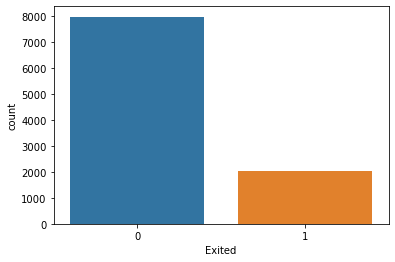

In [24]:
sns.countplot(d1['Exited'])

# 9. Handling Imbalanced Data With SMOTE

In [25]:
X = d1.drop(columns='Exited')
y = d1['Exited']

In [28]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [29]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# 10. Splitting The Dataset Into The Training Set And Test Set

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]

(12740, 3186, 12740, 3186)

# 11. Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [35]:
X_train_ = pd.DataFrame(X_train)

In [36]:
X_train_.describe().T

,count,mean,std,min,25%,50%,75%,max
0,12740.0,1.768775e-16,1.000039,-3.257880,-0.690717,0.008425,0.696644,2.204170
1,12740.0,2.846145e-17,1.000039,-2.311423,-0.694265,-0.087831,0.619675,5.167930
2,12740.0,2.997776e-18,1.000039,-1.781620,-0.673237,0.065685,0.804607,1.912991
3,12740.0,7.839534e-17,1.000039,-1.332436,-1.332436,0.350242,0.767528,2.760013
4,12740.0,-5.191208e-16,1.000039,-0.725779,-0.725779,-0.725779,1.035109,4.556885
5,12740.0,1.141247e-16,1.000039,-1.281856,-1.281856,0.780119,0.780119,0.780119
6,12740.0,-3.052329e-16,1.000039,-0.762001,-0.762001,-0.762001,1.312335,1.312335
7,12740.0,-1.280765e-16,1.000039,-1.750083,-0.856412,-0.001633,0.857930,1.736461
8,12740.0,-3.229407e-16,1.000039,-0.572154,-0.572154,-0.572154,-0.572154,1.747782
9,12740.0,8.683356e-16,1.000039,-0.463506,-0.463506,-0.463506,-0.463506,2.157471


# 12. MODEL TRANNING 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, classification_report, f1_score,r2_score,confusion_matrix


# LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
pred_1 = lr.predict(X_test)

In [44]:
accuracy_score(y_test,pred_1)*100

78.75078468298807

In [45]:
precision_score(y_test,pred_1)

0.7740926157697121

In [46]:
r2_score(y_test,pred_1)

0.1494951398809723

In [47]:
cr = classification_report(y_test,pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1633
           1       0.77      0.80      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



# SVC     ---- 

here i will use all the default parameter of the svc 

In [48]:
sv= SVC()   
sv.fit(X_train,y_train)

SVC()

In [49]:
pred_2 = sv.predict(X_test)

In [51]:
accuracy_score(y_test,pred_2)*100

84.36911487758945

In [53]:
precision_score(y_test,pred_2)*100

83.32280480101075

In [55]:
f1_score(y_test,pred_2)*100

84.11989795918367

In [56]:
r2_score(y_test,pred_2)

0.37437013243829276

In [57]:
cr = classification_report(y_test,pred_2)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1633
           1       0.83      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



# GradientBoostingClassifier

In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [59]:
pred_3 = gb.predict(X_test)

In [61]:
accuracy_score(y_test,pred_3)*100

84.80853735091023

In [63]:
precision_score(y_test,pred_3)*100

83.85053831538949

In [65]:
f1_score(y_test,pred_3)*100

84.54661558109832

In [66]:
r2_score(y_test,pred_3)

0.3919581206829994

In [68]:
cr = classification_report(y_test,pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1633
           1       0.84      0.85      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



# RandomForestClassifier

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
pred_4 = rf.predict(X_test)

In [82]:
accuracy_score(y_test,pred_4)*100

87.03703703703704

In [83]:
precision_score(y_test,pred_4)*100

85.40372670807453

In [78]:
r2_score(y_test,pred_4)

0.48115434678115443

In [79]:
f1_score(y_test,pred_4)

0.869427758457161

In [81]:
cr = classification_report(y_test, pred_4)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1633
           1       0.85      0.89      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



# DecisionTreeClassifier

In [84]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
pred_5 = dt.predict(X_test)

In [87]:
accuracy_score(y_test,pred_5)*100

80.69679849340866

In [89]:
precision_score(y_test,pred_5)*100

78.28709288299156

In [90]:
f1_score(y_test,pred_5)

0.8084708813453754

In [91]:
r2_score(y_test,pred_5)

0.2273848021075302

In [94]:
cr = classification_report(y_test,pred_5)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1633
           1       0.78      0.84      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



# KNeighborsClassifier

In [92]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [95]:
pred_6 = kn.predict(X_test)

In [96]:
accuracy_score(y_test,pred_6)

0.8279974890144381

In [97]:
precision_score(y_test,pred_6)

0.8003586371787209

In [98]:
f1_score(y_test,pred_6)

0.8301301921884687

In [99]:
r2_score(y_test,pred_6)

0.31155588870719764

In [100]:
cr = classification_report(y_test,pred_6)

In [101]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1633
           1       0.80      0.86      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [103]:
,
accuracy_score(y_test,pred_1)*100
result = pd.DataFrame({'MODEL':['LR','SVM','GB','RF','DT','KNN'], 'ACCURACY_SCORE': [accuracy_score(y_test,pred_1)*100,
                                                                                   accuracy_score(y_test,pred_2)*100,
                                                                                   accuracy_score(y_test,pred_3)*100,
                                                                                   accuracy_score(y_test,pred_4)*100,
                                                                                   accuracy_score(y_test,pred_5)*100,
                                                                                    accuracy_score(y_test,pred_6)*100
                                                                                   ]})

In [104]:
result

,MODEL,ACCURACY_SCORE
0,LR,78.750785
1,SVM,84.369115
2,GB,84.808537
3,RF,87.037037
4,DT,80.696798
5,KNN,82.799749


C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MODEL', ylabel='ACCURACY_SCORE'>

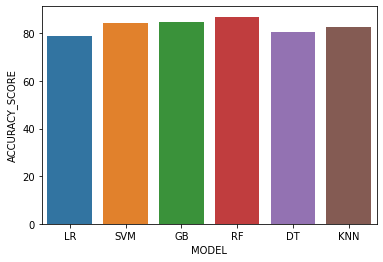

In [105]:
sns.barplot(result['MODEL'], result['ACCURACY_SCORE'])